In [3]:
!pip install -r requirements.txt

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- Environment Setup ---
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['JOBLIB_LOKY_BACKEND'] = 'threading'
plt.style.use('ggplot')

# Load the original dataset
file_path = 'Mall_Customers.csv'
df = pd.read_csv(file_path)

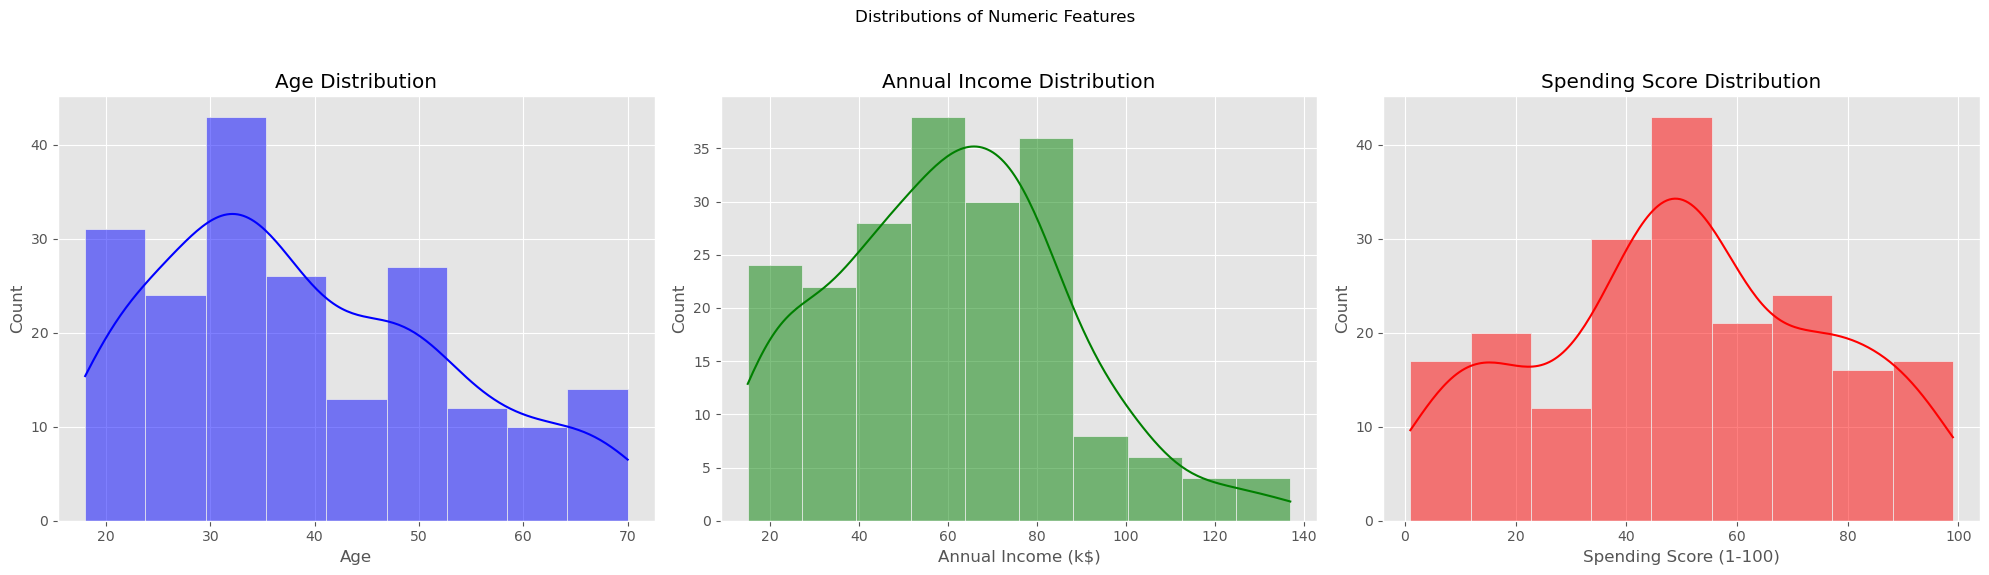

In [7]:
# --- Plot 1: Histograms for Numeric Feature Distributions ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distributions of Numeric Features')

sns.histplot(df['Age'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Age Distribution')

sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Annual Income Distribution')

sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axes[2], color='red')
axes[2].set_title('Spending Score Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Generating bar chart...


Text(0, 0.5, 'Count')

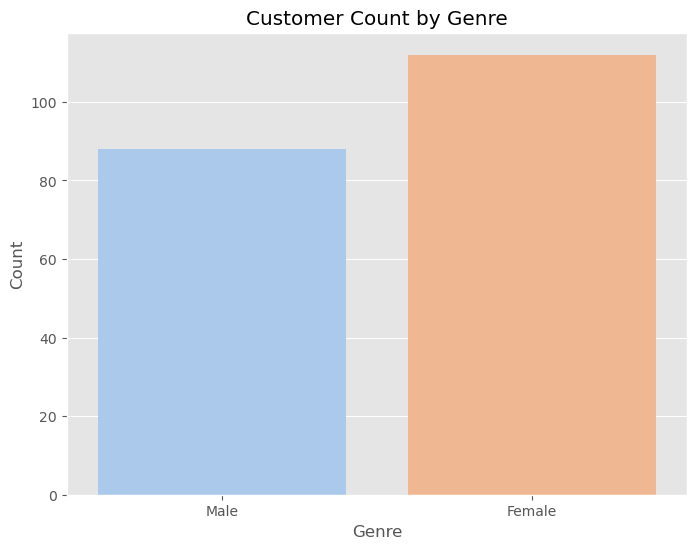

In [9]:
# --- Plot 2: Bar Chart for Categorical Feature ---
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Genre', palette='pastel')
plt.title('Customer Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')

Text(0.5, 1.02, 'Pair Plot of Customer Features by Genre')

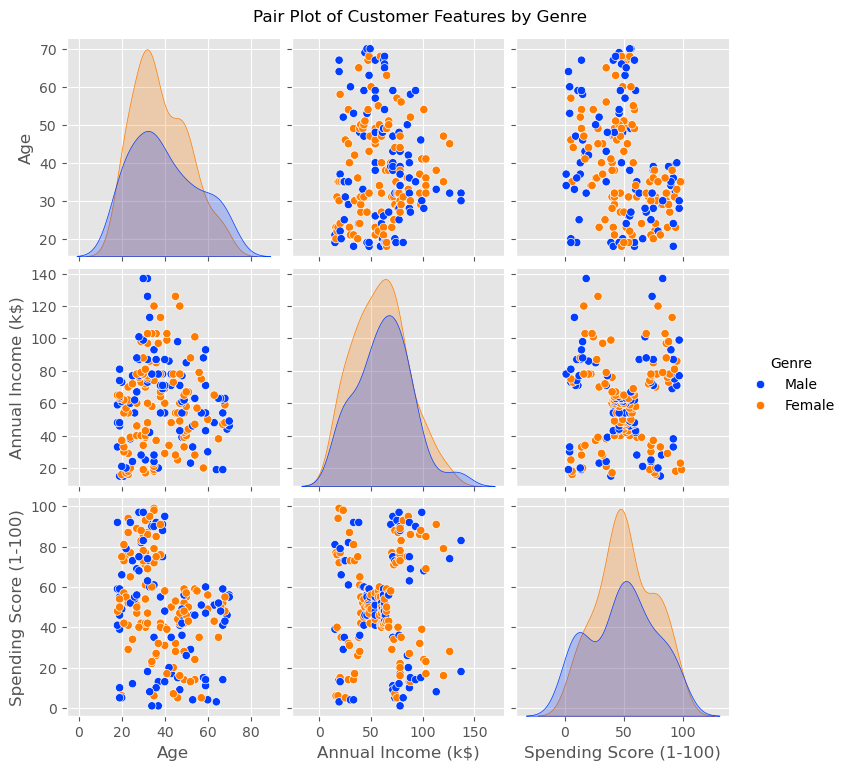

In [11]:
# --- Plot 3: Pair Plot for All Numeric Relationships ---
df_numeric = df.drop(columns=['CustomerID'])
sns.pairplot(df_numeric, hue='Genre', palette='bright')
plt.suptitle('Pair Plot of Customer Features by Genre', y=1.02)

Text(0.5, 1.0, 'Spending Score by Genre')

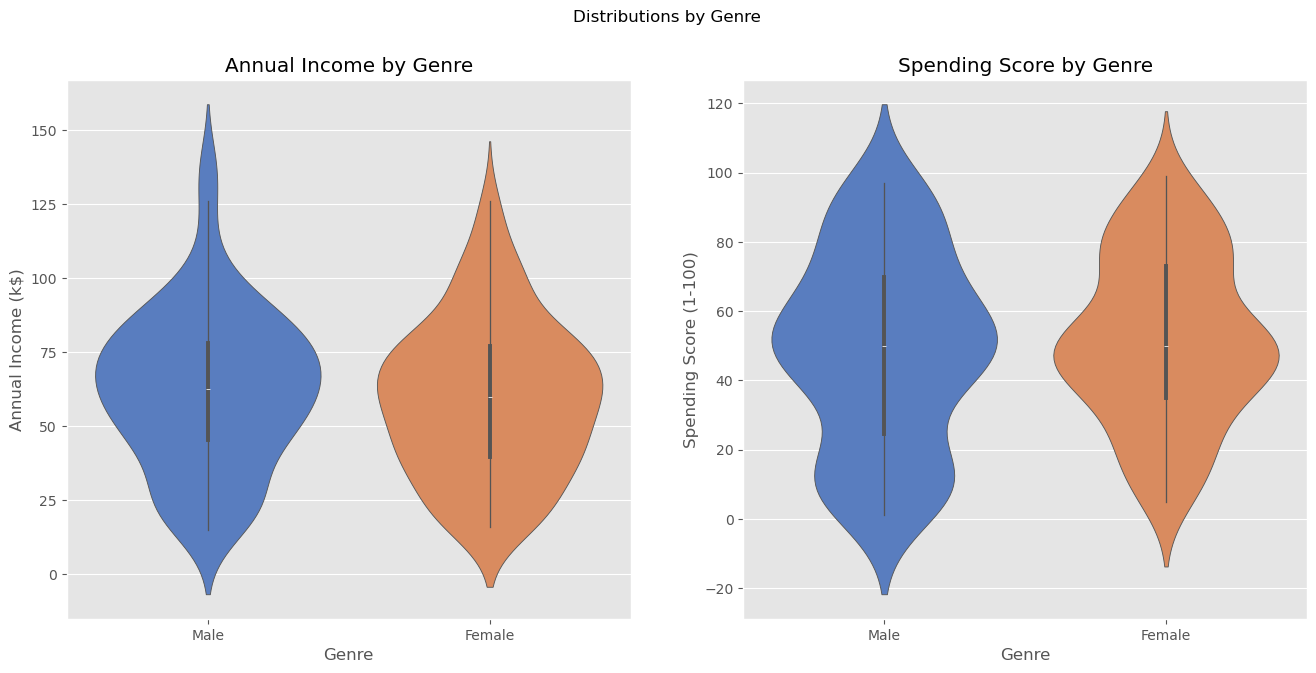

In [13]:
# --- Plot 4: Violin Plots (Distribution by Category) ---
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Distributions by Genre')

sns.violinplot(data=df, x='Genre', y='Annual Income (k$)', ax=axes[0], palette='muted')
axes[0].set_title('Annual Income by Genre')

sns.violinplot(data=df, x='Genre', y='Spending Score (1-100)', ax=axes[1], palette='muted')
axes[1].set_title('Spending Score by Genre')

Text(0, 0.5, 'Density')

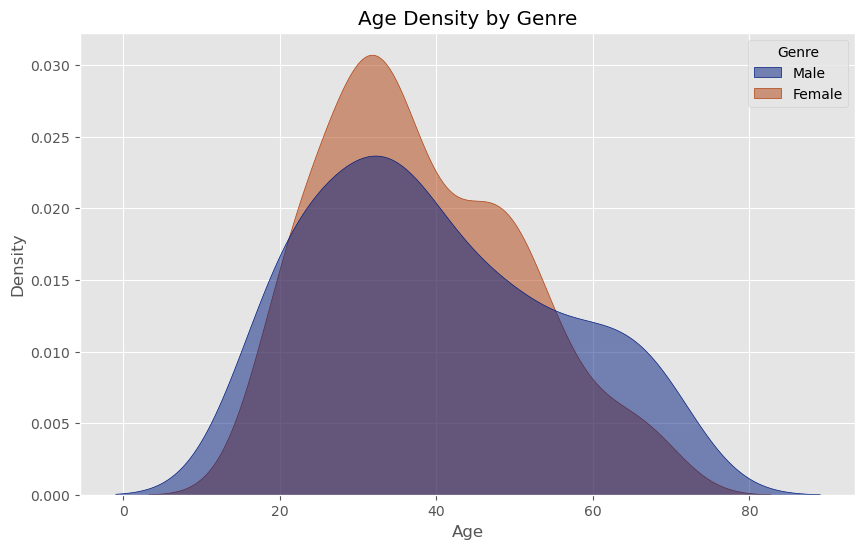

In [15]:
# --- Plot 5: KDE Plot (Line Chart) for Age by Genre ---
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Genre', fill=True, common_norm=False, alpha=0.5, palette='dark')
plt.title('Age Density by Genre')
plt.xlabel('Age')
plt.ylabel('Density')

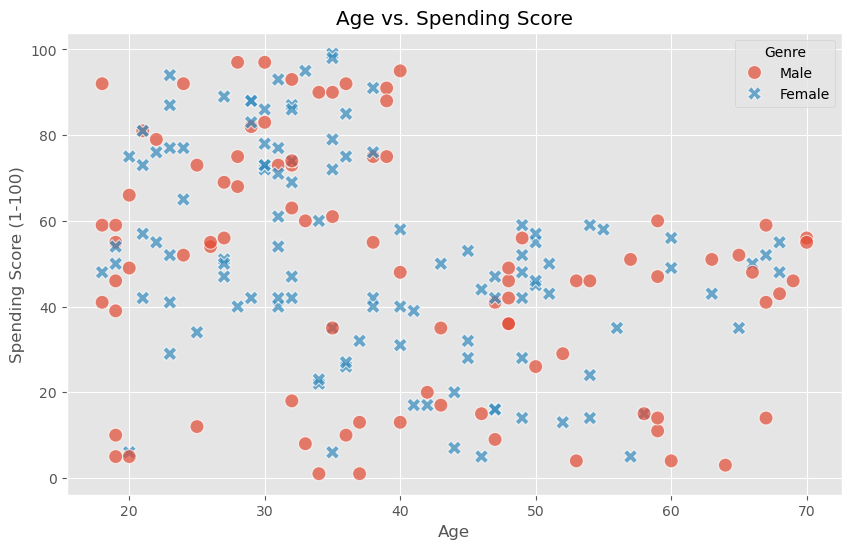

In [17]:
# --- Plot 6: Scatter Plot (Age vs Spending Score) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Genre', style='Genre', s=100, alpha=0.7)
plt.title('Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)

Text(0.5, 1.0, 'Correlation Heatmap of Mall Customers')

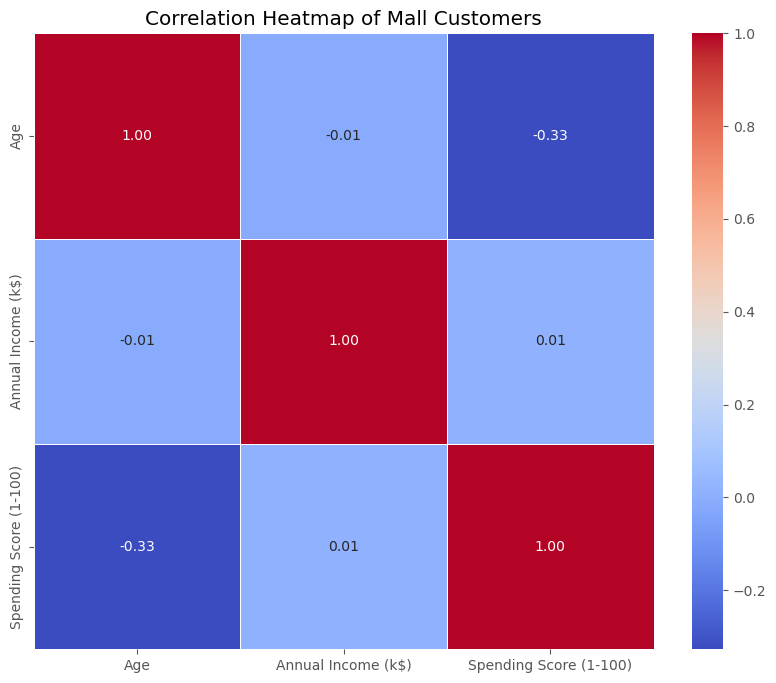

In [19]:
# Correlation map
df_orig = pd.read_csv(file_path)
df_numeric = df_orig.drop(columns=['CustomerID', 'Genre'])
corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True,     
    fmt='.2f',    
    cmap='coolwarm', 
    linewidths=0.5  
)
plt.title('Correlation Heatmap of Mall Customers')